In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/마케팅_전처리/마케팅커뮤니케이션.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,섬세이 브랜드의 바운더리 및 팀원의 시야를 확장시킵니다 해외 신규 제휴처 확보 및 ...,25년차 학력 무관 영어 소통하는 것에 능숙하신 분 미국 시장에 대한 이해도가 높...
1,타겟 고객에 대한 세일즈 전략을 수립하고 실행합니다 B2B 마켓을 타겟하는 마...,3년 이상의 SaaS 및 B2B대기업 공기관 등 세일즈 경험 자신만의 고객사 관리...
2,컨텐츠 마케팅 전략 기획 블로그 관리 업무 SNS바이럴 마케팅 콘텐츠 제작 관리 ...,미적 감각을 겸비한 다재 다능한 마케터 Adobe Photoshop Illustr...
3,세일즈 목표 관리 및 영업 전략 수립 대행사 대상 신규 시장 기회 발굴 인아웃바운...,미디어렙사 매체사 종대사 미디어팀 등 유관 업계 경력을 최소 5년 이상 보유하신 ...
4,기업 뉴미디어 채널 기획 및 운영 유튜브 채널 기획 운영 제작부서와의 협업 ...,해당분야 경력 2년 8년 디지털 플랫폼유튜브 소셜미디어 등에 대한 이해도가 높...
...,...,...
111,온라인마케팅 전략 수립 및 실행 검색엔진 최적화SEO를 통한 웹사이트 트래픽 증대...,학력 무관 경력3년이상 필수 디자인포토샵일러스트 능숙자퍼포먼스마케팅 가능한 분 ...
112,비플레인 SNS 콘텐츠 기획 및 운영 관리 비플레인 서포터즈 체험단 등 바이럴 운...,SNS 운영 콘텐츠 기획 경력이 2년 이상이신 분 뷰티 유튜버에 흥미와 관심도가...
113,1 브랜드의 인플루언서 마케팅을 수주하고 집행 및 관리 2 브랜드의 마케팅 니즈 방...,1 인플루언서 마케팅커머스에 관심 있으신 분 2 트렌드에 관심이 많고 제품브랜드 발...
114,효과적 효율적인 마케팅 실행을 통해 미리캔버스 글로벌 유효 고객 수와 매출을 폭발...,미리캔버스 글로벌 고객 수를 폭발적으로 성장시킬 수 있는 비전과 실행 계획을 깊게...


In [3]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,25년차 학력 무관 영어 소통하는 것에 능숙하신 분 미국 시장에 대한 이해도가 높...
1,3년 이상의 SaaS 및 B2B대기업 공기관 등 세일즈 경험 자신만의 고객사 관리...
2,미적 감각을 겸비한 다재 다능한 마케터 Adobe Photoshop Illustr...
3,미디어렙사 매체사 종대사 미디어팀 등 유관 업계 경력을 최소 5년 이상 보유하신 ...
4,해당분야 경력 2년 8년 디지털 플랫폼유튜브 소셜미디어 등에 대한 이해도가 높...
...,...
111,학력 무관 경력3년이상 필수 디자인포토샵일러스트 능숙자퍼포먼스마케팅 가능한 분 ...
112,SNS 운영 콘텐츠 기획 경력이 2년 이상이신 분 뷰티 유튜버에 흥미와 관심도가...
113,1 인플루언서 마케팅커머스에 관심 있으신 분 2 트렌드에 관심이 많고 제품브랜드 발...
114,미리캔버스 글로벌 고객 수를 폭발적으로 성장시킬 수 있는 비전과 실행 계획을 깊게...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/마케팅_전처리/마케팅커뮤니케이션(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n 25년차 학력 무관 영어 소통하는 것에 능숙하신 분 미국 시장에 대한 이해도가 높은 분 남자의 경우 병역필 또는 면제자 신용 정보 보호 및 이용에 관한 법률상에 결격 사유가 없는 분 기타 취업 규정이나 법령에서 정하는 결격 사유가 없는 분 해외에서 제품 및 서비스를 홍보 및 판매해보신 분\n 3년 이상의 SaaS 및 B2B대기업 공기관 등 세일즈 경험 자신만의 고객사 관리방법 보유 Clevel 대상으로 세일즈 PT 경험 협상가 마인드셋을 기반으로 한 대내외 커뮤니케이션 스킬 데이터 기반의 전략적 사고방식 Go To Market 전략 수립과 실행에 경험이 있거나 관심이 많은 분 신규 솔루션 사업전략 기획 및 실행 경험 재피어 구글독스 CRM 사용경험 인바운드 아운바운드 콜드콜 경험 자기주도적 업무 진행 설명과 설득의 차이점을 아시는 분\n 미적 감각을 겸비한 다재 다능한 마케터 Adobe Photoshop Illustrator 기본 사용 가능하신 분 디지털 광고 매체에 대한 관심이 높으신 분 유쾌하고 긍정적인 마인드를 가지신 분 대화와 소통을 좋아하고 공감 능력이 좋은 분 목표 지향적인 마인드와 유연한 태도를 가지신 분 마케팅 콘텐츠 디자인 제작 경력이 있으신 분 SEO 관련 지식이나 경험이 있으신 분 엔구 서비스를 잘 알고 계시는 분\n 미디어렙사 매체사 종대사 미디어팀 등 유관 업계 경력을 최소 5년 이상 보유하신 분 문제 해결 역량과 성과목표 지향적 성향을 가지신 분 팀 리딩 경험이 있으신분 조직 세팅 및 리딩 경험이 있으신 분 도전적이고 포기하지 않는 강인한 의지가 있으신 분 세일즈를 넘어 전략적인 사업 확장 리드 경험을 보유하신 분 국내 광고 시장 구조와 디지털 매체에 대한 이해도가 높으신 분 디지털 매체 및 OOH 오프라인 미디어 파트너쉽 체결 경험을 비롯한 매체 업무 경험을 보유하신 분\n 해당분야 경력 2년  8년  디지털 플랫폼유튜브 소셜미디어 등에 대한 이해도가 높으신 분 디지털 마케팅 프로젝트 경쟁 PT 참여 및 수

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '학력',
 '무관',
 '영어',
 '소통',
 '것',
 '분',
 '미국',
 '시장',
 '대한',
 '이해도',
 '분',
 '남자',
 '경우',
 '병역',
 '필',
 '면제',
 '신용',
 '정보',
 '보호',
 '및',
 '이용',
 '관',
 '법률상',
 '결격',
 '사유',
 '분',
 '기타',
 '취업',
 '규정',
 '법령',
 '정',
 '결격',
 '사유',
 '분',
 '해외',
 '제품',
 '및',
 '서비스',
 '홍보',
 '및',
 '판매',
 '분',
 '이상',
 '및',
 '대기업',
 '기관',
 '등',
 '경험',
 '자신',
 '고객',
 '사',
 '관리',
 '방법',
 '보유',
 '대상',
 '경험',
 '협상',
 '마인드',
 '셋',
 '기반',
 '내외',
 '커뮤니케이션',
 '스킬',
 '데이터',
 '기반',
 '전략',
 '사고방식',
 '전략',
 '수립',
 '실행',
 '경험',
 '관심',
 '분',
 '신규',
 '솔루션',
 '사업',
 '전략',
 '기획',
 '및',
 '실행',
 '경험',
 '재',
 '피어',
 '구글독스',
 '사용',
 '경험',
 '인',
 '바운드',
 '운',
 '바운드',
 '콜드',
 '콜',
 '경험',
 '자기',
 '주도',
 '업무',
 '진행',
 '설명',
 '설득',
 '차이점',
 '아시',
 '분',
 '미적',
 '감각',
 '겸비',
 '다재',
 '능',
 '마케터',
 '기본',
 '사용',
 '분',
 '디지털',
 '광고',
 '매체',
 '대한',
 '관심',
 '분',
 '긍정',
 '마인드',
 '분',
 '대화',
 '소통',
 '공감',
 '능력',
 '분',
 '목표',
 '지향',
 '마인드',
 '태도',
 '분',
 '마케팅',
 '콘텐츠',
 '디자인',
 '제작',
 '경력',
 '분',
 '관련',
 '지식',
 '경험'

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

6014
593


FreqDist({'분': 611, '경험': 247, '마케팅': 178, '및': 158, '경력': 116, '이상': 92, '대한': 81, '등': 79, '커뮤니케이션': 75, '능력': 70, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '역량','가능','기반','관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '우대',
 '사항',
 '학력',
 '무관',
 '영어',
 '소통',
 '것',
 '미국',
 '시장',
 '남자',
 '경우',
 '병역',
 '필',
 '면제',
 '신용',
 '정보',
 '보호',
 '이용',
 '관',
 '법률상',
 '결격',
 '사유',
 '기타',
 '취업',
 '규정',
 '법령',
 '정',
 '결격',
 '사유',
 '해외',
 '제품',
 '서비스',
 '홍보',
 '판매',
 '대기업',
 '기관',
 '경험',
 '자신',
 '고객',
 '관리',
 '방법',
 '대상',
 '경험',
 '협상',
 '마인드',
 '셋',
 '내외',
 '커뮤니케이션',
 '스킬',
 '데이터',
 '전략',
 '사고방식',
 '전략',
 '경험',
 '솔루션',
 '사업',
 '전략',
 '기획',
 '경험',
 '재',
 '피어',
 '구글독스',
 '사용',
 '경험',
 '바운드',
 '운',
 '바운드',
 '콜드',
 '콜',
 '경험',
 '자기',
 '주도',
 '진행',
 '설명',
 '설득',
 '차이점',
 '아시',
 '미적',
 '감각',
 '겸비',
 '다재',
 '능',
 '마케터',
 '기본',
 '사용',
 '광고',
 '매체',
 '긍정',
 '마인드',
 '대화',
 '소통',
 '공감',
 '목표',
 '지향',
 '마인드',
 '태도',
 '마케팅',
 '콘텐츠',
 '디자인',
 '지식',
 '경험',
 '구',
 '서비스',
 '알',
 '미디어렙',
 '체사',
 '종대',
 '미디어',
 '유관',
 '업계',
 '최소',
 '문제',
 '성과',
 '목표',
 '지향',
 '성향',
 '리딩',
 '경험',
 '신분',
 '조직',
 '세팅',
 '리딩',
 '경험',
 '도전',
 '포기',
 '의지',
 '를',
 '전략',
 '사업',
 '확장',
 '리드',
 '경험',
 '국내',
 '광고',
 '시장',
 '구조',
 '매체',
 '매체',
 '오프라

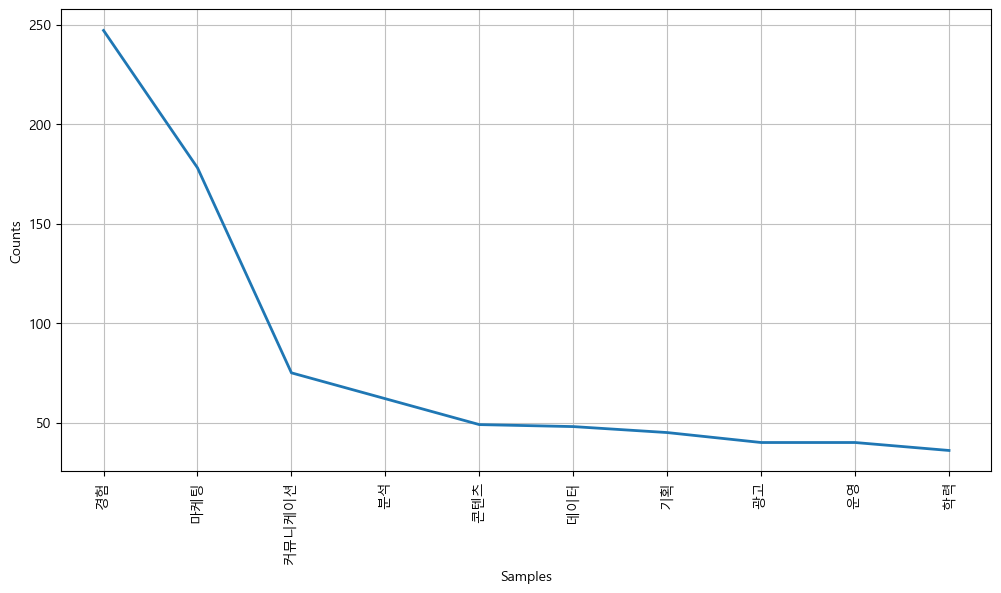

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

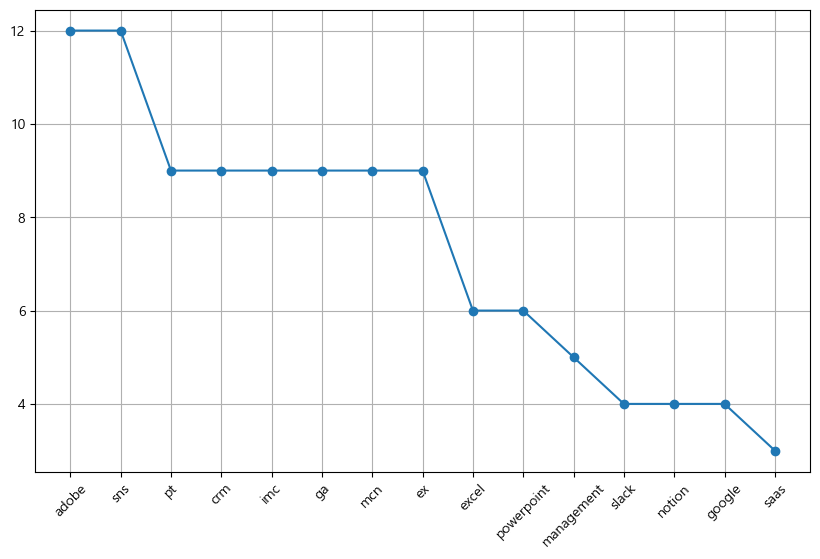

In [12]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['ok','strong','enjoy','pc','journey','work','etc','face','wallet','success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)